__________________________________________________________________________________________________________________________________________________
# **ASSIGNMENT 02 - CLASSIFICATION EXERCISE**
__________________________________________________________________________________________________________________________________________________
- Due Date: November 15th 2022
- Course: Data Analytics for Decision Making
- Master: MCSBT
- Professor: Jesús García San Luis

## **INTRODUCTION**
________________________________________________________________________________________________________________________________________________
A great number of the tasks that are carried out as part of operation and business processes focus on the organisation and classification of data to facilitate its management or automazation. The goal of this assignment is the prediction of whether a customer will leave a company or not, we will do this through classification techniques adter preparing the data, like we did in the first assignment. 

Additionaly, in this assignment we will build a prediction model that will perform a classification of the customers of a company, whther they will leave of not. 

__________________________________________________________________________________________________________________________________________________
### **FIRST STEPS** -> importing libraries we will be using and loading the data set

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [6]:
# Read dataset
d = pd.read_csv('churn_modeling.csv')

__________________________________________________________________________________________________________________________________________________
## **DATA ANALYSIS**
In this section of the assignment we will go through the dataframe, analysing the most important features.

In [7]:
# Printing the whole dataset to see its shape, attributes, features and columns.
d

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [8]:
d.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


Some things to highlight from this table are the customer ages go from 18 to 92 years old with the median around 40. Another interesting thing to look at is the TENURE (permanencia) with a mean of around 5 years and most of customer's tenure are above 3 years, showing high level of loyalty. 
Customers are pretty wealthy we could say, being the estimated salary above 51000 for the majority. 
Probably the most important feature to look at is out target variable: **EXITED**. This feature allows us to calculate the churn rate of the customers.

Now, we will look more in detail at the different feature, especially those that I believe to be more relevant.

In [9]:
d_churned = d[d['Exited'] == 1]
d_retained = d[d['Exited'] == 0]

### **1. Age**

<AxesSubplot:xlabel='Age', ylabel='count'>

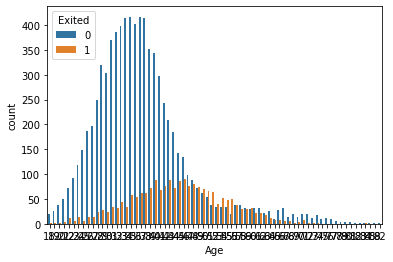

In [10]:
sns.countplot(x='Age', hue = 'Exited', data = d)

Looking closely at the age column, we have to highlight that the older the customer, the more likely he will be to leave the company. 

### **2. CreditScore**

<AxesSubplot:xlabel='CreditScore', ylabel='count'>

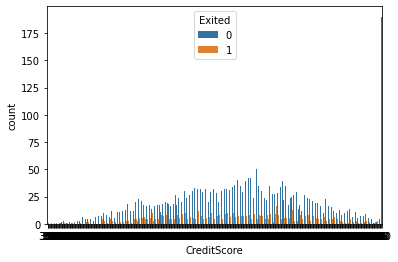

In [11]:
sns.countplot(x='CreditScore', hue = 'Exited', data = d)

This column does not tell us much about the likelyhood of leaving the company, the distribution of data is pretty much the same

__________________________________________________________________________________________________________________________________________________
## **DATA PREPARATION**
*This part of the assignment consists on the act of cleaning and consolidating the raw data before submitting it to analysis. Carrying out the process of validating, cleaning and augmenting the raw data is the foundation to obtain precise and significant insights from them. 
In this assignment we will recall some of the data preparation techniques seen in the first assignment and session 4 of the course.* 



In [12]:
# In the previous chunk of code we can already see its shape, but to see it more clearly: 
d.shape

(10000, 14)

*From the last commands, we can see that the dataset has 10000 rows and 14 columns. Now we will see more in depth what these rows and columns contain and make a cleans so that the data can be analysed.*

- First we will look inside all rows to see if there are null values, if there are any, we will impute them. Null or missing values can be described as those values that are not stored for some variables, these values can reduce the accuracy of our model and bias it, they are often represented as NaN. 

- Then we will look at each of the colums, analysing and understanding its features. After examining the columns one of the most usual operations is narrowing down the columns. This can be effectuated because the columns or features do not provide significant information for the model to meke a good prediction. 

- We will perform encodings on the categorical columns that require it. Categorical values are those that can only take a fixed, limited amount of values. We can perform different types of encoding such as replacing values or one hot encoding and see the effect they have on the accuracy. 

- We also have to address class imbalance. A balanced dataset is one in which the same number of input samples are used to represent each output class (or target class), in this class the "Exited" feature.

- Lastly, Scaling (or standardising) the data is another major aspect when we are talking about predictions. The standardisation is a data preparation procedure that is executed with the aim of rescaling the columns so that the mean and standard deviation are 0 and 1 respectively. ***DISCLAIMER: I will first do a first run at the exercise without doing the standarization, after this first case I will try standardising the data and compare the results***

### **1. SEARCHING FOR NULL VALUES**

In [13]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [14]:
# SEARCHING FOR NULL VALUES. These commands will look for the number of missing values in each column
d.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

As we can see, the dataset is free of missing values, this is an unusual case. Either way, by implementing the imputer code shown below, it would impute the missing values with the *sklearn.impute* library and clean the data from missing values. 

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer()
imputed = imputer.fit_transform(d)
df_imputed = pd.DataFrame(imputed, columns=d.columns)

df_imputed

### **2. NARROWING COLUMNS**
First of all, we can look at the amount of unique values in each of the features (columns). This gives us a broad idea of how the data is distributed.

In [15]:
d.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

-> As we can see, the first observation we can make by looking at the results is that the first two features are specific for each of the customers. This way, we determine that we can get rid of the first two columns. Another column we can get rid of is the Surname column, as we can see there are 2932 unique values for this column, nevertheless, it is specific to each customer so we come to the conclusion that we can forget about this column even if they are repeated. 

**Narrowing down the data frame: columns RowNumber, CustomerID and Surname**

In [16]:
d = d.drop(columns = ["RowNumber", "CustomerId", "Surname"])
d

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


As we can see we end up with 11 relevant columns to analyse. 

### **3. ENCODING**
We will perform encodings on the variables that require it, these are those features that can only take a fixed, limited amount of values. There are different ways to perform encodings, I have opted to do an arbitrary encoding of those variables that require it, nevertheless if I have time I will perform a one hot encoding and compare the results between the two encodings. 

Firstly we will have a look at the categorical features we find in our data frame, and thanks to the d.nunique() chunk of code we see that the columns with few unique values are: Geography, Gender, Tenure, NumOfProducts, HasCrCard, IsActiveMember and Exited, but we already know that Exited is 0 if they have exited and 1 if they are loyal. 

Now, from the d.info() chunk of code, we can see the data type of each feature (Dtype), and we come to the conslusion that the only columns we have to encode are Geography and Gender (the only OBJECT types we find = strings), the rest are integers so we can assume they are already "encoded". -> We have to encode those OBJECT types so that the learner is able to analyse the data since it can only read numerical values. 


In [17]:
d['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [18]:
d['Gender'].unique()

array(['Female', 'Male'], dtype=object)

### **3.1. Geography**

<AxesSubplot:xlabel='Geography', ylabel='count'>

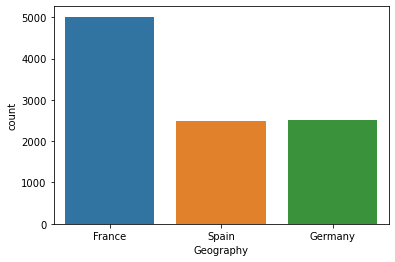

In [19]:
sns.countplot(x='Geography', data = d)

It is important to note that customers come from 3 different countries (Fannce, Spain and Germany), with the most number of residents in France.

**Now we encode the Geography column -> France = 1 ; Spain = 2 ; Germany = 3**

In [20]:
def encode_type(x):
    if x == 'France':
        return 1
    if x == 'Spain':
        return 2
    if x == 'Germany':
        return 3

d['Geography'] = d['Geography'].transform(encode_type)
d

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,Female,42,2,0.00,1,1,1,101348.88,1
1,608,2,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,1,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,1,Female,39,1,0.00,2,0,0,93826.63,0
4,850,2,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,1,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,1,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,3,Male,42,3,75075.31,2,1,0,92888.52,1


### **3.2. Gender**

<AxesSubplot:xlabel='Gender', ylabel='count'>

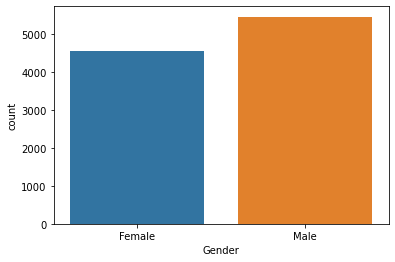

In [21]:
sns.countplot(x='Gender', data = d)

The only thing we can highlight from this histogram is that there are more males than females. 

**Now we encode the Gender feature -> Male = 1 ; Female = 0

In [22]:
def encode_type(x):
    if x == 'Female':
        return 0
    if x == 'Male':
        return 1


d['Gender'] = d['Gender'].transform(encode_type)
d

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,1,0,42,8,159660.80,3,1,0,113931.57,1
3,699,1,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,1,39,5,0.00,2,1,0,96270.64,0
9996,516,1,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,1,0,36,7,0.00,1,0,1,42085.58,1
9998,772,3,1,42,3,75075.31,2,1,0,92888.52,1


### **4. EXITED CLASS IMBALANCE**
We will be looking at the exited class and try to balance the data set so that the learner can take an almost equal amount of observations, the major justification for this is to give each class equal priority. 

Data balancing is important when predicting variables with low probability of taking place.

**First we check how balanced the data frame is:**

In [23]:
# Check how balanced is the dataset
d_churned = d[d['Exited'] == 1]
d_retained = d[d['Exited'] == 0]

print(len(d_churned))
print(len(d_retained))

2037
7963


As we can see, the number of people that are loyal customers is much higher than the people that have exited. So we conclude the data frame is imbalanced. 

**Now we proceed and balance the data frame**
We do this so that the number of input samples are used to represent each of the output class (in this case Exited)

In [24]:
# The dataset is unbalanced. 
# With this code we will undersample the dataset and get balanced classes

# index property contains the indexes of the d_retained dataset
d_retained_indexes = d_retained.index

# get as many fraud indexes (randomly) as non fraud occurrences
np.random.seed(42)
random_d_retained_indexes = np.random.choice(d_retained_indexes, len(d_churned))

# Keep those entries in d_retained
d_retained_bis = d.loc[random_d_retained_indexes]

# We will form the balanced dataset concatenating d_retained and d_churned
bln = d_churned.append(d_retained_bis)

# Check the result
print(len(bln[bln.Exited == 1]))
print(len(bln[bln.Exited == 0]))

2037
2037


/var/folders/qb/krnv1mhn7h7b_hnb5z9d1dgw0000gn/T/ipykernel_97416/1953443837.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bln = d_churned.append(d_retained_bis)


Now we have a **BALANCED** data frame ('bln'), by undersampling the data frame we got 2037 input samples to represent each of the output class.

### **5. STANDARDISATION**

This process is done with the aim of normalising the range of the features in the data. We will standardise or normalise the data by substracting the mean and diving by the standard deviation: 

*(d[column] - d[column].mean()) / d[column].std()*

In [25]:
d_standard = d
for column in ['CreditScore', 'Age', 'Balance','EstimatedSalary']:
    d_standard[column] = (d_standard[column] - d_standard[column].mean()) / d_standard[column].std()
d

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.326205,1,0,0.293503,2,-1.225786,1,1,1,0.021885,1
1,-0.440014,2,0,0.198154,1,0.117344,1,0,1,0.216523,0
2,-1.536717,1,0,0.293503,8,1.332987,3,1,0,0.240675,1
3,0.501496,1,0,0.007456,1,-1.225786,2,0,0,-0.108912,0
4,2.063781,2,0,0.388852,2,0.785689,1,1,1,-0.365258,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246426,1,1,0.007456,5,-1.225786,2,1,0,-0.066416,0
9996,-1.391870,1,1,-0.373939,10,-0.306363,1,1,1,0.027987,0
9997,0.604958,1,0,-0.278590,7,-1.225786,1,0,1,-1.008593,1
9998,1.256772,3,1,0.293503,3,-0.022606,2,1,0,-0.125224,1


**DISCLAIMER: I will also balance the standardised data set**

In [26]:
# Check how balanced is the dataset
d_standard_churned = d_standard[d_standard['Exited'] == 1]
d_standard_retained = d_standard[d_standard['Exited'] == 0]

print(len(d_standard_churned))
print(len(d_standard_retained))

2037
7963


In [27]:
# The dataset is unbalanced. 
# With this code we will undersample the dataset and get balanced classes

# index property contains the indexes of the d_retained dataset
d_standard_retained_indexes = d_standard_retained.index

# get as many fraud indexes (randomly) as non fraud occurrences
np.random.seed(42)
random_d_standard_retained_indexes = np.random.choice(d_standard_retained_indexes, len(d_standard_churned))

# Keep those entries in d_retained
d_standard_retained_bis = d_standard.loc[random_d_standard_retained_indexes]

# We will form the balanced dataset concatenating d_retained and d_churned
bln_standard = d_standard_churned.append(d_standard_retained_bis)

# Check the result
print(len(bln_standard[bln_standard.Exited == 1]))
print(len(bln_standard[bln_standard.Exited == 0]))

/var/folders/qb/krnv1mhn7h7b_hnb5z9d1dgw0000gn/T/ipykernel_97416/2939982177.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bln_standard = d_standard_churned.append(d_standard_retained_bis)


2037
2037


### **TRAIN AND TEST DATA SETS**

At this point, what I have noticed is that we should sepparate the data set into a **TEST** dataframe and a **TRAIN** dataframe. So what I will do is sepparate the **'d'** dataframe (the initial dataframe) into test and train. Nevertheless I have noticed that some of the libraries do this step on their own. So this might be useful or not, +++++ I would have to balance these dataframes whenever necessary.

In [28]:
d_train = d.sample(frac=0.8,random_state=200)
d_test = d.drop(d_train.index)
print(len(d_train))
print(len(d_test))

8000
2000


In [29]:
d_standard_train = d_standard.sample(frac=0.8,random_state=200)
d_standard_test = d_standard.drop(d_standard_train.index)
print(len(d_standard_train))
print(len(d_standard_test))

8000
2000


________________________________________________________________________________________________________________________________________________
## **OUTPUT OF THE DATA PREPARATION SECTION**

In this chunk of Markdown I give an overview and comments about the outputs of the ***DATA PREPARATION*** section of the exercise. 

This gives me a pretty good summary of the variables I can use in the next sections. 

### **Non-Standardised Outputs:**

- **d** = original dataframe to which I performed the next operations:
    - Removed NULL values (NaN)
    - Narrowed down the columns, removing *RowNumber, CustomerID and Surname* columns
    - Encoded the next category columns: *Geography and Gender*

- **d_churned** = dataframe with the rows from **d** that have an exited value of 1 (this means customers that left) ***length = 2037***
- **d_retained** = dataframe with the rows from **d** that have an exited value of 0 (this means customers that are loyal) ***length = 7963***
- **d_retained_bis** = this is a narrowed down version of **d_retained** with the same number of rows , chosen randomly ***length = 2037***

- **bln** = balanced data set with 2037 rows of churned customers and 2037 rows of retained customers ***length = 2 * 2037***

- **d_train** = train data set, ***length = 8000***
- **d_test** = test data set, ***length = 2000***


### **Standardised Outputs:**
I will first do the classification part of the exercise with the non-standardised data set and the with the standardised, this will enable be to compare the results. I decided not to compare the unbalanced and balanced results, assuming the balanced data set will produce much better predictions. 

- **d_standard** = STANDARDISED original dataframe to which I performed the next operations:
    - Removed NULL values (NaN)
    - Narrowed down the columns, removing *RowNumber, CustomerID and Surname* columns
    - Encoded the next category columns: *Geography and Gender*

- **d_standard_churned** = STANDARDISED dataframe with the rows from **d** that have an exited value of 1 (this means customers that left) ***length = 2037***
- **d_standard_retained** = STANDARDISED dataframe with the rows from **d** that have an exited value of 0 (this means customers that are loyal) ***length = 7963***
- **d_standard_retained_bis** = STANDARDISED this is a narrowed down version of **d_retained** with the same number of rows , chosen randomly ***length = 2037***

- **bln_standard** = STANDARDISED balanced data set with 2037 rows of churned customers and 2037 rows of retained customers ***length = 2 * 2037***

- **d_standard_train** = STANDARDISED train data set, ***length = 8000***
- **d_standard_test** = STANDARDISED test data set, ***length = 2000***

________________________________________________________________________________________________________________________________________________

________________________________________________________________________________________________________________________________________________
# **CLASSIFICATION MODELS APPLICATION**

________________________________________________________________________________________________________________________________________________
## **1. LogisticRegression**

Logistic regression, despite its name, is a linear model for classification rather than regression. Logistic regression is also known in the literature as logit regression, maximum-entropy classification (MaxEnt) or the log-linear classifier. In this model, the probabilities describing the possible outcomes of a single trial are modeled using a logistic function.

### **1.1. LogisticRegression, Unbalanced, Non-standardised, with Train and Test dataframes**

In [41]:
LogReg1 = LogisticRegression(random_state=0).fit(d_train.drop(columns = ["Exited"]),d_train["Exited"])
LogReg1_prediction = LogReg1.predict(d_test.drop(columns = ["Exited"]))
auc11 = cross_val_score(LogisticRegression(random_state=0), d.drop(columns = ["Exited"]),d["Exited"], scoring ='roc_auc')

print ("Confusion Matrix: --------------------")
print(metrics.confusion_matrix(d_test["Exited"], LogReg1_prediction))
print ("Mean acccuracy: " + str(LogReg1.score(d_test.drop(columns = ["Exited"]),d_test["Exited"])))
print("The cross_val_score function returns a vector with the score for every partition in the cross validation: ")
print(auc11)
print ("ROC Area Under the Curve: " + str(auc11.mean()))

Confusion Matrix: --------------------
[[1552   58]
 [ 308   82]]
Mean acccuracy: 0.817
The cross_val_score function returns a vector with the score for every partition in the cross validation: 
[0.78091438 0.75933128 0.77008133 0.76541565 0.74144561]
ROC Area Under the Curve: 0.7634376468616683


**Accuracy** = 0.817

**AUC** = 0.7634

### **1.2. LogisticRegression, Unbalanced, Standardised, with Train and Test dataframes**

In [42]:
LogReg2 = LogisticRegression(random_state=0).fit(d_standard_train.drop(columns = ["Exited"]),d_standard_train["Exited"])
LogReg2_prediction = LogReg2.predict(d_standard_test.drop(columns = ["Exited"]))
auc12 = cross_val_score(LogisticRegression(random_state=0), d_standard.drop(columns = ["Exited"]),d_standard["Exited"], scoring ='roc_auc')

print ("Confusion Matrix: --------------------")
print(metrics.confusion_matrix(d_standard_test["Exited"], LogReg2_prediction))
print ("Mean acccuracy: " + str(LogReg2.score(d_standard_test.drop(columns = ["Exited"]),d_standard_test["Exited"])))
print("The cross_val_score function returns a vector with the score for every partition in the cross validation: ")
print(auc12)
print ("ROC Area Under the Curve: " + str(auc12.mean()))

Confusion Matrix: --------------------
[[1552   58]
 [ 308   82]]
Mean acccuracy: 0.817
The cross_val_score function returns a vector with the score for every partition in the cross validation: 
[0.78091438 0.75933128 0.77008133 0.76541565 0.74144561]
ROC Area Under the Curve: 0.7634376468616683


**Accuracy** = 0.817

**AUC** = 0.7634

As we can see, with unbalanced datasets, the logistic regression model gives the same accuracy, so we can conclude that the standardisation does not make a difference. Let's try with the balanced set now: 

### **1.3. LogisticRegression, Balanced, Non-Standardised**

First let's divide the balanced data set 'bln' into train and test data:

In [32]:
bln_train = bln.sample(frac=0.8,random_state=200)
bln_test = bln.drop(bln_train.index)
print(len(bln_train))
print(len(bln_test))

3259
737


Now let's implement the LogisticRegression model:

In [47]:
LogReg3 = LogisticRegression(random_state=0).fit(bln_train.drop(columns = ["Exited"]),bln_train["Exited"])
LogReg3_prediction = LogReg3.predict(bln_test.drop(columns = ["Exited"]))
auc13 = cross_val_score(LogisticRegression(random_state=0), bln.drop(columns = ["Exited"]),bln["Exited"], scoring ='roc_auc')
#Here I'm trying to caculate the mean accuracy with the crass_val_score function -> different method but pretty much the same result
auc131 = cross_val_score(LogisticRegression(random_state=0), bln.drop(columns = ["Exited"]),bln["Exited"])
print (auc131)
print ("Mean accuracy: " + str(auc131.mean()))

print ("Confusion Matrix: --------------------")
print(metrics.confusion_matrix(bln_test["Exited"], LogReg3_prediction))
print ("Mean acccuracy: " + str(LogReg3.score(bln_test.drop(columns = ["Exited"]),bln_test["Exited"])))
print("The cross_val_score function returns a vector with the score for every partition in the cross validation: ")
print(auc13)
print ("Mean ROC Area Under the Curve: " + str(auc13.mean()))

[0.66748466 0.65521472 0.63558282 0.69079755 0.66584767]
Mean accuracy: 0.6629854840897785
Confusion Matrix: --------------------
[[225  99]
 [134 279]]
Mean acccuracy: 0.683853459972863
The cross_val_score function returns a vector with the score for every partition in the cross validation: 
[0.71344004 0.69730091 0.70093222 0.74654333 0.72639135]
Mean ROC Area Under the Curve: 0.7169215701662587


**Accuracy** = 0.68385

**AUC** = 0.7169

Here we obtain a curious result, the accuracy is lower that the AUC.

### **1.4. LogisticRegression, Balanced, Non-Standardised**

First let's divide the balanced standarised data set 'bln_standard' into train and test data:

In [34]:
bln_standard_train = bln_standard.sample(frac=0.8,random_state=200)
bln_standard_test = bln_standard.drop(bln_standard_train.index)
print(len(bln_standard_train))
print(len(bln_standard_test))

3259
737


In [48]:
LogReg4 = LogisticRegression(random_state=0).fit(bln_standard_train.drop(columns = ["Exited"]),bln_standard_train["Exited"])
LogReg4_prediction = LogReg4.predict(bln_standard_test.drop(columns = ["Exited"]))
auc14 = cross_val_score(LogisticRegression(random_state=0), bln_standard.drop(columns = ["Exited"]),bln_standard["Exited"], scoring ='roc_auc')
#Here I'm trying to caculate the mean accuracy with the crass_val_score function -> different method but pretty much the same result
auc141 = cross_val_score(LogisticRegression(random_state=0), bln_standard.drop(columns = ["Exited"]),bln_standard["Exited"])
print (auc141)
print ("Mean accuracy: " + str(auc141.mean()))

print ("Confusion Matrix: --------------------")
print(metrics.confusion_matrix(bln_standard_test["Exited"], LogReg4_prediction))
print ("Mean acccuracy: " + str(LogReg4.score(bln_standard_test.drop(columns = ["Exited"]),bln_standard_test["Exited"])))
print("The cross_val_score function returns a vector with the score for every partition in the cross validation: ")
print(auc14)
print ("Mean ROC Area Under the Curve: " + str(auc14.mean()))

[0.72638037 0.71042945 0.71042945 0.7202454  0.69287469]
Mean accuracy: 0.712071871090276
Confusion Matrix: --------------------
[[239  85]
 [122 291]]
Mean acccuracy: 0.7191316146540027
The cross_val_score function returns a vector with the score for every partition in the cross validation: 
[0.77301633 0.76182734 0.77114949 0.78870983 0.76834149]
Mean ROC Area Under the Curve: 0.7726088969838065


**Accuracy** = 0.7191

**AUC** = 0.7726

With the balanced set, the standarisation improves accuracy, Nevertheless we obtain the same result of the AUC being lower that the accuracy

### **1.5. Conclusions of LogisticRegression**

The standarisation does not make a difference with the unbalanced set, and both the Accuracy and AUC are higher than with a balanced set. 

But using the balanced set, we observe a curious result, the AUC is higher than the accuracy. 

|                              | Accuracy | Roc_AUC |
|------------------------------|----------|---------|
| Unbalanced + Non-standardise | 0.817    | 0.7634  |
| Unbalanced + Standardise     | 0.817    | 0.7634  |
| Balanced + Non-standardise   | 0.6838   | 0.7169  |
| Balanced + Standardise       | 0.7191   | 0.7726  |


________________________________________________________________________________________________________________________________________________
## **2. SupportVectorClassification (SVC)**



First we set up the GridSearchCV to tune the metaparameters. 

- **estimator:** SVC() support vecor classification

- **parameter grid:** these are the parameters we have defined in the 'params' variable where: 
    - **C:** Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive.
    - **Kernel:** Specifies the kernel type to be used in the algorithm. In this case 'poly' which dived the dataset into 2 degrees with a split0_testScore of 	
        0.80
    - **degree:** Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.
    

- **scoring:** Strategy to evaluate the performance of the cross-validated model on the test set.

________________________________________________________________________________________________________________________________________________
### **GridSearchCV application to SupportVectorClassification:**
Here I show the code needed to implement the GridSearchCV module, I do this to show you that I have used it. Nevertheless I have decided not to proceed with this module to study the SupportVectorClassification, because I have determined that I won't be able to produce as many results as using the SVC model directly, the cross_val_score function will already give me the partitions I want to do the cross validation. Same thing for the GradientBoostingClassifier.

In [100]:
# At this point you must include the code to train the models, tune their metaparameters and crossvalidate the results
# An example of use of GridSearchCV with the roc_auc score:

#   # define the parameters grid  
params = [{'C': [1, 2], 'kernel': ['poly'], 'degree': [1, 2]}]

#   # get the models calling GridSearchCV
svc_models = GridSearchCV(SVC(), params, scoring='roc_auc')
best_svc = svc_models.fit(d.drop(columns = ["Exited"]),d["Exited"])
svc = svc_models.score(d.drop(columns = ["Exited"]),d["Exited"])


In [99]:
print('   Best Score (roc_auc_score): '+ str(np.round(best_svc.best_score_, 3)))

print('   Best Parameters: ')

for key, value in best_svc.best_params_.items():
    print('     ' + str(key) + ': ' + str(value))

   Best Score (roc_auc_score): 0.778
   Best Parameters: 
     C: 1
     degree: 2
     kernel: poly


**DISCLAIMER:** I have only done the case of Unbalanced not standarised data set with GridSearchCV because it has proven to give the most accurate results

**AUC=** 0.778 -> Best AUC calculated using the GridSearchCV module.

### **2.1. SVC() Unbalanced, Non-standardised**

In [70]:
svc1 = SVC(random_state=0).fit(d_train.drop(columns = ["Exited"]),d_train["Exited"])
scv1_prediction = svc1.predict(d_test.drop(columns = ["Exited"]))
svc1_auc = cross_val_score(SVC(random_state=0), d.drop(columns = ["Exited"]),d["Exited"], scoring ='roc_auc')

print ("Confusion Matrix: --------------------")
print(metrics.confusion_matrix(d_test["Exited"], scv1_prediction))
print("Mean accuracy: " + str(svc1.score(d_train.drop(columns = ["Exited"]),d_train["Exited"])))
print("The cross_val_score function returns a vector with the score for every partition in the cross validation: ")
print(svc1_auc)
print ("ROC Area Under the Curve: " + str(svc1_auc.mean()))

Confusion Matrix: --------------------
[[1599   11]
 [ 318   72]]
Mean accuracy: 0.82875
The cross_val_score function returns a vector with the score for every partition in the cross validation: 
[0.8210384  0.82685486 0.83524048 0.82970644 0.8115203 ]
ROC Area Under the Curve: 0.8248720975152548


**Accuracy** = 0.82875

**AUC** = 0.82487

### **2.2. SVC() Unbalanced, Standardised**

In [71]:
svc2 = SVC(random_state=0).fit(d_standard_train.drop(columns = ["Exited"]),d_standard_train["Exited"])
scv2_prediction = svc2.predict(d_standard_test.drop(columns = ["Exited"]))
svc2_auc = cross_val_score(SVC(random_state=0), d_standard.drop(columns = ["Exited"]),d_standard["Exited"], scoring ='roc_auc')

print ("Confusion Matrix: --------------------")
print(metrics.confusion_matrix(d_standard_test["Exited"], scv2_prediction))
print("Mean accuracy: " + str(svc2.score(d_standard_train.drop(columns = ["Exited"]),d_standard_train["Exited"])))
print("The cross_val_score function returns a vector with the score for every partition in the cross validation: ")
print(svc2_auc)
print ("ROC Area Under the Curve: " + str(svc2_auc.mean()))

Confusion Matrix: --------------------
[[1599   11]
 [ 318   72]]
Mean accuracy: 0.82875
The cross_val_score function returns a vector with the score for every partition in the cross validation: 
[0.8210384  0.82685486 0.83524048 0.82970644 0.8115203 ]
ROC Area Under the Curve: 0.8248720975152548


**Accuracy** = 0.82875

**AUC** = 0.82487

-> Once again, with the unbalanced data set, the standardisation does not make a difference.

### **2.3. SVC() Balanced, Non-Standardised**
First let's divide the balanced data set 'bln' into train and test data:

In [72]:
bln_train = bln.sample(frac=0.8,random_state=200)
bln_test = bln.drop(bln_train.index)
print(len(bln_train))
print(len(bln_test))

3259
737


In [74]:
svc3 = SVC(random_state=0).fit(bln_train.drop(columns = ["Exited"]),bln_train["Exited"])
scv3_prediction = svc3.predict(bln_test.drop(columns = ["Exited"]))
svc3_auc = cross_val_score(SVC(random_state=0), bln.drop(columns = ["Exited"]),bln["Exited"], scoring ='roc_auc')

print ("Confusion Matrix: --------------------")
print(metrics.confusion_matrix(bln_test["Exited"], scv3_prediction))
print("Mean accuracy: " + str(svc3.score(bln_train.drop(columns = ["Exited"]),bln_train["Exited"])))
print("The cross_val_score function returns a vector with the score for every partition in the cross validation: ")
print(svc3_auc)
print ("ROC Area Under the Curve: " + str(svc3_auc.mean()))

Confusion Matrix: --------------------
[[131 193]
 [ 99 314]]
Mean accuracy: 0.566738263270942
The cross_val_score function returns a vector with the score for every partition in the cross validation: 
[0.5980633  0.56941032 0.56874789 0.59538951 0.57967147]
ROC Area Under the Curve: 0.5822564993615723


**Accuracy** = 0.56673

**AUC** = 0.58225

And once again, we see a huge drop in the accuracy with the balanced set. Let's try it standardising the data.

### **2.4. SVC() Balanced,Standardised**
First let's divide the balanced standarised data set 'bln_standard' into train and test data:

In [75]:
bln_standard_train = bln_standard.sample(frac=0.8,random_state=200)
bln_standard_test = bln_standard.drop(bln_standard_train.index)
print(len(bln_standard_train))
print(len(bln_standard_test))

3259
737


In [77]:
svc4 = SVC(random_state=0).fit(bln_standard_train.drop(columns = ["Exited"]),bln_standard_train["Exited"])
scv4_prediction = svc4.predict(bln_standard_test.drop(columns = ["Exited"]))
svc4_auc = cross_val_score(SVC(random_state=0), bln_standard.drop(columns = ["Exited"]),bln_standard["Exited"], scoring ='roc_auc')

print ("Confusion Matrix: --------------------")
print(metrics.confusion_matrix(bln_standard_test["Exited"], scv4_prediction))
print("Mean accuracy: " + str(svc4.score(bln_standard_train.drop(columns = ["Exited"]),bln_standard_train["Exited"])))
print("The cross_val_score function returns a vector with the score for every partition in the cross validation: ")
print(svc4_auc)
print ("ROC Area Under the Curve: " + str(svc4_auc.mean()))

Confusion Matrix: --------------------
[[248  76]
 [104 309]]
Mean accuracy: 0.7465480208652961
The cross_val_score function returns a vector with the score for every partition in the cross validation: 
[0.8044214  0.79241942 0.80693862 0.82281881 0.80788293]
ROC Area Under the Curve: 0.8068962378400159


**Accuracy** = 0.7465

**AUC** = 0.80689

With the balanced set we see again a raise in the accuracy wheneever we standardise the data, but still the auc is higher than the accuracy.

### **2.5. Conclusions of SupportVectorClassification**

The standarisation does not make a difference with the unbalanced set, and both the Accuracy and AUC are higher than with a balanced set. 

But using the balanced set, we observe a curious result, the AUC is higher than the accuracy. 

|                              | Accuracy | Roc_AUC |
|------------------------------|----------|---------|
| Unbalanced + Non-standardise | 0.82875  | 0.82487 |
| Unbalanced + Standardise     | 0.82875  | 0.82487 |
| Balanced + Non-standardise   | 0.56673  | 0.58225 |
| Balanced + Standardise       | 0.7465   | 0.80689 |

________________________________________________________________________________________________________________________________________________
## **3. GradientBoostClassifier**
This method uses the gradients in the loss function to weight the points that are difficult to predict. Ensemble methods are very powerful and usually get very good results.

### **GridSearchCV application to SupportVectorClassification:**
Here I show the code needed to implement the GridSearchCV module, I do this to show you that I have used it. Nevertheless I have decided not to proceed with this module to study the SupportVectorClassification, because I have determined that I won't be able to produce as many results as using the SVC model directly, the cross_val_score function will already give me the partitions I want to do the cross validation. Same thing for the GradientBoostingClassifier.

In [101]:
# At this point you must include the code to train the models, tune their metaparameters and crossvalidate the results
# An example of use of GridSearchCV with the roc_auc score:

#   # define the parameters grid  
params = [{'learning_rate': [0.001, 0.01], 'n_estimators': [600], 'criterion': ['friedman_mse', 'squared_error']}]

#   # get the models calling GridSearchCV
gbc_models = GridSearchCV(GradientBoostingClassifier(random_state=0), params, scoring='roc_auc')
best_gbc = gbc_models.fit(d.drop(columns = ["Exited"]),d["Exited"])
gbc = gbc_models.score(d.drop(columns = ["Exited"]),d["Exited"])

In [102]:
print('   Best Score (roc_auc_score): '+ str(np.round(best_gbc.best_score_, 3)))

print('   Best Parameters: ')

for key, value in best_gbc.best_params_.items():
    print('     ' + str(key) + ': ' + str(value))

   Best Score (roc_auc_score): 0.863
   Best Parameters: 
     criterion: friedman_mse
     learning_rate: 0.01
     n_estimators: 600


**DISCLAIMER:** I have only done the case of Unbalanced not standarised data set with GridSearchCV because it has proven to give the most accurate results

**AUC=** 0.863 -> Best AUC calculated using the GridSearchCV module.

### **3.1. GBC Unbalanced, Non-standarised**

In [80]:
gbc1 = GradientBoostingClassifier(random_state=0).fit(d_train.drop(columns = ["Exited"]),d_train["Exited"])
gbc1_prediction = gbc1.predict(d_test.drop(columns = ["Exited"]))
gbc1_auc = cross_val_score(GradientBoostingClassifier(random_state=0), d.drop(columns = ["Exited"]),d["Exited"], scoring ='roc_auc')

print ("Confusion Matrix: --------------------")
print(metrics.confusion_matrix(d_test["Exited"], gbc1_prediction))
print("Mean accuracy: " + str(gbc1.score(d_train.drop(columns = ["Exited"]),d_train["Exited"])))
print("The cross_val_score function returns a vector with the score for every partition in the cross validation: ")
print(gbc1_auc)
print ("ROC Area Under the Curve: " + str(gbc1_auc.mean()))

Confusion Matrix: --------------------
[[1551   59]
 [ 208  182]]
Mean accuracy: 0.87325
The cross_val_score function returns a vector with the score for every partition in the cross validation: 
[0.8655879  0.86832677 0.86441526 0.86673191 0.86191045]
ROC Area Under the Curve: 0.8653944579755087


**Accuracy** = 0.87325

**AUC** = 0.8653

### **3.2. GBC Unbalanced, Standarised**

In [87]:
gbc2 = GradientBoostingClassifier(random_state=0).fit(d_standard_train.drop(columns = ["Exited"]),d_standard_train["Exited"])
gbc2_prediction = gbc2.predict(d_standard_test.drop(columns = ["Exited"]))
gbc2_auc = cross_val_score(GradientBoostingClassifier(random_state=0), d_standard.drop(columns = ["Exited"]),d_standard["Exited"], scoring ='roc_auc')

print ("Confusion Matrix: --------------------")
print(metrics.confusion_matrix(d_standard_test["Exited"], gbc2_prediction))
print("Mean accuracy: " + str(gbc2.score(d_standard_train.drop(columns = ["Exited"]),d_standard_train["Exited"])))
print("The cross_val_score function returns a vector with the score for every partition in the cross validation: ")
print(gbc2_auc)
print ("ROC Area Under the Curve: " + str(gbc2_auc.mean()))

Confusion Matrix: --------------------
[[1551   59]
 [ 208  182]]
Mean accuracy: 0.87325
The cross_val_score function returns a vector with the score for every partition in the cross validation: 
[0.8655879  0.86832677 0.86441526 0.86673191 0.86191045]
ROC Area Under the Curve: 0.8653944579755087


**Accuracy** = 0.87325

**AUC** = 0.8653

Once again same result for the unbalanced data set either standarised or non-standardised

### **3.3. GBC Balanced, Non-standarised**
First let's divide the balanced data set 'bln' into train and test data:

In [84]:
bln_train = bln.sample(frac=0.8,random_state=200)
bln_test = bln.drop(bln_train.index)
print(len(bln_train))
print(len(bln_test))

3259
737


In [91]:
gbc3 = GradientBoostingClassifier(random_state=0).fit(bln_train.drop(columns = ["Exited"]),bln_train["Exited"])
gbc3_prediction = gbc3.predict(bln_test.drop(columns = ["Exited"]))
gbc3_auc = cross_val_score(GradientBoostingClassifier(random_state=0), bln.drop(columns = ["Exited"]),bln["Exited"], scoring ='roc_auc')

print ("Confusion Matrix: --------------------")
print(metrics.confusion_matrix(bln_test["Exited"], gbc3_prediction))
print("Mean accuracy: " + str(gbc3.score(bln_train.drop(columns = ["Exited"]),bln_train["Exited"])))
print("The cross_val_score function returns a vector with the score for every partition in the cross validation: ")
print(gbc3_auc)
print ("ROC Area Under the Curve: " + str(gbc3_auc.mean()))

Confusion Matrix: --------------------
[[255  69]
 [ 99 314]]
Mean accuracy: 0.8158944461491255
The cross_val_score function returns a vector with the score for every partition in the cross validation: 
[0.86530448 0.85562702 0.86256444 0.87204317 0.87198232]
ROC Area Under the Curve: 0.8655042838631507


**Accuracy** = 0.8158

**AUC** = 0.8655

### **3.4. GBC Balanced, Standarised**
First let's divide the balanced standarised data set 'bln_standard' into train and test data:

In [86]:
bln_standard_train = bln_standard.sample(frac=0.8,random_state=200)
bln_standard_test = bln_standard.drop(bln_standard_train.index)
print(len(bln_standard_train))
print(len(bln_standard_test))

3259
737


In [92]:
gbc4 = GradientBoostingClassifier(random_state=0).fit(bln_standard_train.drop(columns = ["Exited"]),bln_standard_train["Exited"])
gbc4_prediction = gbc4.predict(bln_standard_test.drop(columns = ["Exited"]))
gbc4_auc = cross_val_score(GradientBoostingClassifier(random_state=0), bln_standard.drop(columns = ["Exited"]),bln_standard["Exited"], scoring ='roc_auc')

print ("Confusion Matrix: --------------------")
print(metrics.confusion_matrix(bln_standard_test["Exited"], gbc4_prediction))
print("Mean accuracy: " + str(gbc4.score(bln_standard_train.drop(columns = ["Exited"]),bln_standard_train["Exited"])))
print("The cross_val_score function returns a vector with the score for every partition in the cross validation: ")
print(gbc4_auc)
print ("ROC Area Under the Curve: " + str(gbc4_auc.mean()))

Confusion Matrix: --------------------
[[255  69]
 [ 99 314]]
Mean accuracy: 0.8158944461491255
The cross_val_score function returns a vector with the score for every partition in the cross validation: 
[0.86551525 0.85562702 0.86256444 0.87204317 0.87206684]
ROC Area Under the Curve: 0.8655633415280762


**Accuracy** = 0.8158

**AUC** = 0.8655

### **3.5. Conclusions of GradientBoostClassifier**

The standarisation does not make a difference with the unbalanced set, and both the Accuracy and AUC are higher than with a balanced set. 

But using the balanced set, we observe a curious result, the AUC is higher than the accuracy. 

|                              | Accuracy | Roc_AUC |
|------------------------------|----------|---------|
| Unbalanced + Non-standardise | 0.87325  | 0.86539 |
| Unbalanced + Standardise     | 0.87325  | 0.86539 |
| Balanced + Non-standardise   | 0.8158   | 0.8655  |
| Balanced + Standardise       | 0.8158   | 0.8655  |

__________________________________________________________________________________________________________________________________________________
# **COMPARISON BETWEEN THE MODELS**
__________________________________________________________________________________________________________________________________________________

The next tables have been calculated through the implementation of the code for each of the models. Calculation the confusion matrix, mean accuracy and roc_acu for each of the cases. The cases include all combinations for the data set between Balanced and Unbalanced, and Standarised and Non-standarised.

## **Logistic Regression**
 LogisticRegression            | Accuracy | Roc_AUC |
|------------------------------|----------|---------|
| Unbalanced + Non-standardise | 0.817    | 0.7634  |
| Unbalanced + Standardise     | 0.817    | 0.7634  |
| Balanced + Non-standardise   | 0.6838   | 0.7169  |
| Balanced + Standardise       | 0.7191   | 0.7726  |


## **SUPPORT VECTOR CLASSIFICATION**
| SupportVectorClassification  | Accuracy | Roc_AUC |
|------------------------------|----------|---------|
| Unbalanced + Non-standardise | 0.82875  | 0.82487 |
| Unbalanced + Standardise     | 0.82875  | 0.82487 |
| Balanced + Non-standardise   | 0.56673  | 0.58225 |
| Balanced + Standardise       | 0.7465   | 0.80689 |


## **GRADIENT BOOST CLASSIFIER**
| GradientBoostClassifier      | Accuracy | Roc_AUC |
|------------------------------|----------|---------|
| Unbalanced + Non-standardise | 0.87325  | 0.86539 |
| Unbalanced + Standardise     | 0.87325  | 0.86539 |
| Balanced + Non-standardise   | 0.8158   | 0.8655  |
| Balanced + Standardise       | 0.8158   | 0.8655  |

After a close examination of each of the cases and models, the best model to predict the if a customer will leave the ccompany is the GradientBoostClassifier. For wich I obtained better results for the Unbalanced + Standardise data set with an AUC of 0.86529 and an accuracy of 0.8732. 